In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# Link of the dataset used- https://drive.google.com/file/d/11TwsrKE1_nY10cGb-y_nTw0PVRXvrty6/view?usp=sharing
# Loading the dataset
df=pd.read_csv(r"C:\Users\Radhika\Downloads\Dataset\data3\googleplaystore.csv")

###Attributes Detail
1. App- App Name
2. Category- Category of the app, total 34 categories
3. Rating- Rating on the app
4. Reviews- Total number of reviews on an app
5. Size- Size of the app in mb or kb
6. Installs- Number of installs 
7. Type- Type of the app mainly free or paid
8. Price- Price of the app
9. Content Rating- Content Rating of the app , total 6 categories 
10. Genres- Genre of the app, total 120 categories
11. Last Updated- Date on which app was last updated
12. Current Ver- Current Version of the app, total 2832 categories
13. Android Ver- Current Android Version on which app is running, total 33 categories

In [3]:
# Making a copy of dataframe
df_copy=df.copy()

In [4]:
# Checking the first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Checking the last 5 rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Some columns should be of float or integer datatype but are of object datatype instead.

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are more than 1400 null values in the Rating column.

<Figure size 720x432 with 0 Axes>

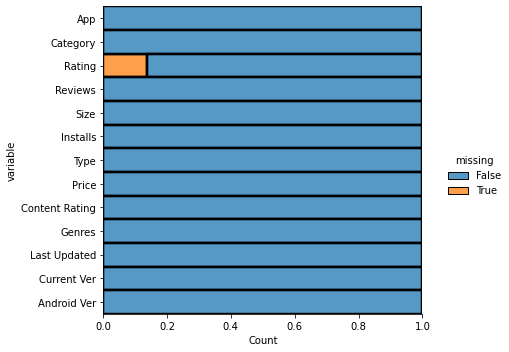

In [8]:
# Plotting the graph of null values
plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.25)

In [9]:
# Checking the shape of dataset
df.shape

(10841, 13)

There are total 10481 rows and 13 columns.

In [10]:
# Checking for duplicate instances/rows in dataset
df.duplicated().sum()

483

In [11]:
df.loc[df.duplicated()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


There are total 483 duplicates in our dataset, which are of no use.

In [12]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Checking the descriptive statistics
df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
# Checking the number of unique values in columns
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [15]:
# Checking the rows in which name of the apps are repeating.
df["App"].value_counts().loc[lambda x: x>1].index # Apps which are repeating more than 1 time

Index(['ROBLOX', '8 Ball Pool', 'Zombie Catchers', 'Helix Jump',
       'Bubble Shooter', 'Temple Run 2', 'Bowmasters', 'Zombie Tsunami',
       'Farm Heroes Saga', 'Duolingo: Learn Languages Free',
       ...
       'Google Translate', 'Vigo Video', 'Minecraft', 'Facebook Lite',
       'Google Docs', 'Castle Clash: Heroes of the Empire US',
       'realestate.com.au - Buy, Rent & Sell Property', 'Toy Blast',
       'Diary with lock', 'PayPal'],
      dtype='object', length=523)

Total 523 Apps are there with repeated names.

In [16]:
# Showing the rows with the same app name (8 Ball Pool)
df.loc[df["App"]=="8 Ball Pool"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


All these rows are of the same app called "8 Ball Pool" just with different number of reviews with the little difference.

In [17]:
# Sorting the dataframe based on Reviews Column in descending order
df = df.sort_values(by='Reviews', ascending=False)
# There are some duplicates just with the different number of reviews with little difference. Hence, dropping the rows with duplicates and keeping the row with highest number of reviews.
df = df.drop_duplicates(subset=["App","Current Ver","Rating","Size","Installs","Type"], keep="first")

In [18]:
# After sorting the values the index values are jumbled now resetting the index values.
df = df.reset_index(drop=True)

In [19]:
# Checking the total unique values in column Price
df["Price"].unique()

array(['0', '$2.49', '$2.99', '$0.99', '$3.99', '$4.99', '$399.99',
       '$1.99', '$79.99', '$7.49', '$4.49', '$9.99', '$5.99', '$13.99',
       '$4.29', '$1.70', '$14.99', '$1.49', '$12.99', '$19.99', '$1.50',
       '$3.49', '$1.29', '$7.99', '$29.99', '$1.59', '$11.99', '$3.02',
       '$39.99', '$89.99', '$6.99', '$2.90', '$1.00', '$19.40', '$5.49',
       '$1.75', '$8.99', '$5.00', '$3.08', '$18.99', '$299.99', '$17.99',
       '$379.99', '$8.49', '$2.56', '$15.46', '$2.95', '$1.97',
       'Everyone', '$19.90', '$1.26', '$4.80', '$2.60', '$24.99', '$4.77',
       '$400.00', '$16.99', '$10.99', '$4.59', '$389.99', '$33.99',
       '$46.99', '$1.76', '$3.90', '$2.00', '$2.50', '$10.00', '$14.00',
       '$3.95', '$6.49', '$3.28', '$1.20', '$2.59', '$4.84', '$37.99',
       '$1.61', '$4.60', '$9.00', '$15.99', '$74.99', '$3.88', '$4.85',
       '$3.04', '$1.04', '$1.96', '$28.99', '$30.99', '$25.99', '$394.99',
       '$3.61', '$109.99', '$200.00', '$154.99'], dtype=object)

In [20]:
# Dropping a row with mismatched values
df.drop(df.loc[df["Price"]=="Everyone"].index,inplace=True)

In [21]:
# Converting the Price column to float datatype by removing the prefix '$'
df["Price"]=df["Price"].str.strip("$")

In [22]:
# Typecasting the Price column
df["Price"]= df["Price"].astype("float64")

In [23]:
# Typecasting the Reviews column
df["Reviews"]=df["Reviews"].astype("int64")

In [24]:
# Checking the total unique values in column Size.
df["Size"].unique()

array(['31M', '91k', '18M', '22M', '33M', 'Varies with device', '5.5M',
       '10M', '38M', '3.7M', '96M', '15M', '97M', '2.9M', '2.8M', '3.9M',
       '49M', '3.2M', '75M', '9.4M', '71M', '6.6M', '19M', '1.1M', '13M',
       '63M', '2.7M', '39M', '51M', '74M', '99M', '27M', '40M', '59M',
       '4.5M', '37M', '55M', '16M', '70M', '7.2M', '73k', '2.0M', '9.7M',
       '6.3M', '3.4M', '720k', '9.9M', '14M', '7.9M', '45M', '20M',
       '6.7M', '1.3M', '87M', '8.9M', '598k', '3.5M', '2.6M', '1.9M',
       '23M', '26M', '3.6M', '30M', '5.1M', '53M', '9.0M', '93k', '4.1M',
       '28M', '25M', '2.5M', '3.8M', '1.0M', '54M', '79M', '12M', '1.5M',
       '5.8M', '82M', '4.7M', '58M', '7.6M', '61M', '7.0M', '64M', '3.1M',
       '118k', '696k', '44M', '411k', '1.2M', '17M', '60M', '57M', '43M',
       '21M', '11M', '9.3M', '6.5M', '3.0M', '1.7M', '6.1M', '387k',
       '8.7M', '9.2M', '35M', '7.3M', '5.4M', '5.0M', '98M', '5.6M',
       '1.6M', '5.7M', '924k', '36M', '2.4M', '383k', '8.6M', 

The size of app is broadly divided into 3 categories:-
1. Size in mb
2. Size in kb
3. Varies with device.

In [25]:
# Creating a list of index of rows where app size ending with k.
list_kb_apps_index=df.loc[df["Size"].str.endswith("k")].index

In [26]:
list_kb_apps_index

Int64Index([   1,   50,   56,   78,  101,  151,  152,  154,  175,  210,
            ...
            9412, 9485, 9512, 9518, 9524, 9540, 9584, 9598, 9651, 9658],
           dtype='int64', length=314)

In [27]:
# Converting the Size of apps to megabytes(mb)
for index in list_kb_apps_index:
    df.at[index,'Size']=str(np.round(float(str(df.loc[index]["Size"]).replace("k",""))/1000,3))+"M"

In [28]:
# Replacing value ("Varies with device") with 0
df.loc[df["Size"]=="Varies with device","Size"]=str(0)+"M"

In [29]:
# Removing the suffix "M" from the column Size.
df["Size"]=df["Size"].str.rstrip("M")

In [30]:
# Typecasting the column Size
df["Size"]=df["Size"].astype("float64")

In [31]:
df["Installs"].unique()

array(['1,000,000+', '100,000+', '500,000+', '50,000+', '10,000,000+',
       '5,000,000+', '10,000+', '50,000,000+', '100,000,000+', '5,000+',
       '1,000+', '1,000,000,000+', '100+', '50+', '500+', '10+',
       '500,000,000+', '5+', '1+', '0+', '0'], dtype=object)

In [32]:
# Removing the '+' symbol
df["Installs"]=df["Installs"].str.rstrip("+")

In [33]:
# Removing the ',' from Installs column
df["Installs"]=df["Installs"].str.replace(",","")

In [34]:
#Typecasting the Intalls column
df["Installs"]=df["Installs"].astype("int64")

In [35]:
# Typecasting the object column to datetime datatype
df["Last Updated"]=df["Last Updated"].astype("datetime64")

In [36]:
# Checking the top 5 rows again
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31.000,1000000,Free,0.0,Everyone,Sports,2018-05-23,6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.091,100000,Free,0.0,Everyone,Tools,2013-12-17,3.2,2.2 and up
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18.000,1000000,Free,0.0,Everyone,Shopping,2018-01-22,1.4,4.3 and up
3,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.000,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up
4,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.000,1000000,Free,0.0,Everyone,Sports,2018-06-05,7.1,5.0 and up


In [37]:
# Checking the shape of the data
df.shape

(9688, 13)

Now the shape of the data has reduced to 9688 rows.

In [38]:
# Checking the description of data
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Rating,Reviews,Size,Installs,Price
count,8224.000,9688.000,9688.000,9688.000,9688.000
mean,4.174,217224.689,17.799,7802265.537,1.096
std,0.536,1830270.505,21.484,53699875.336,16.827
min,1.000,0.000,0.000,0.000,0.000
25%,4.000,25.000,2.900,1000.000,0.000
50%,4.300,979.000,9.100,100000.000,0.000
75%,4.500,29581.500,25.000,1000000.000,0.000
max,5.000,78158306.000,100.000,1000000000.000,400.000


In [39]:
# Segregating the columns based on whether it is categorical or numerical.
categorical_columns=[i for i in df.columns if df[i].dtype=="O"]
numerical_columns=[i for i in df.columns if df[i].dtype == "int64" or df[i].dtype=="float64"]
date_columns=[i for i in df.columns if df[i].dtype == "datetime64"]

In [40]:
# Function to identify and treat outliers in the dataset.
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile=None):
    """ This function will return the lower fence, upper fence and total outliers in the column of a dataframe and in the argument remove_or_fill_with_quartile you can pass drop to drop the outliers(rows) from the dataframe or you can pass fill to fill the lower fence value for outliers which are less than the lower fence and upper fence value for outliers which are greater the upper fence of that column."""
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5*(iqr)
    upper_fence=q3+1.5*(iqr)
    total_outliers=df[col].loc[df[col]<lower_fence].count() + df[col].loc[df[col]>upper_fence].count()
    if remove_or_fill_with_quartile=="drop":
        df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
        df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
    elif remove_or_fill_with_quartile=="fill":
        df[col] = np.where(df[col] < lower_fence, lower_fence, df[col]) # Replacing the outlier value with value of lower fence.
        df[col] = np.where(df[col] > upper_fence, upper_fence, df[col]) # Replacing the outlier value with value of upper fence.
    elif remove_or_fill_with_quartile==None:
        pass
    return lower_fence,upper_fence,total_outliers

In [41]:
for col in numerical_columns:
    print(f"Lower fence for the column {col} is {identifying_treating_outliers(df,col)[0]}, upper fence is {identifying_treating_outliers(df,col)[1]}, total outliers are {identifying_treating_outliers(df,col)[2]}")
    print("--------------------------------------------------------------------------------------------------")

Lower fence for the column Rating is 3.25, upper fence is 5.25, total outliers are 492
--------------------------------------------------------------------------------------------------
Lower fence for the column Reviews is -44309.75, upper fence is 73916.25, total outliers are 1666
--------------------------------------------------------------------------------------------------
Lower fence for the column Size is -30.250000000000007, upper fence is 58.150000000000006, total outliers are 658
--------------------------------------------------------------------------------------------------
Lower fence for the column Installs is -1497500.0, upper fence is 2498500.0, total outliers are 1996
--------------------------------------------------------------------------------------------------
Lower fence for the column Price is 0.0, upper fence is 0.0, total outliers are 756
--------------------------------------------------------------------------------------------------


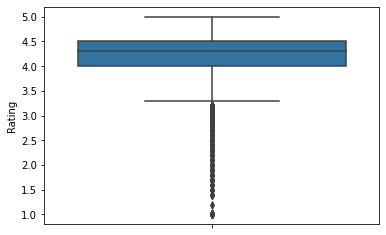

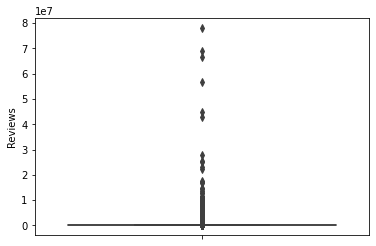

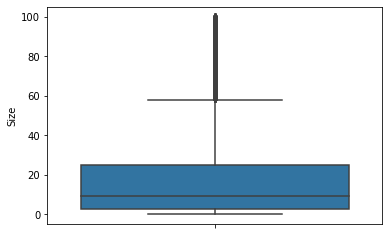

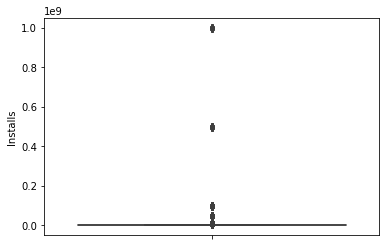

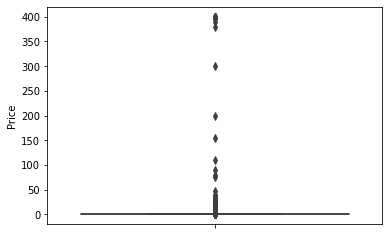

In [42]:
# Plotting the graphs to check the outliers
for col in numerical_columns:
    try:
        plt.figure(figsize=(6,4))
        sns.boxplot(y=df[col],)
        plt.show()
    except Exception as e:
            print(e)

In [43]:
numerical_columns

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9688 entries, 0 to 9688
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9688 non-null   object        
 1   Category        9688 non-null   object        
 2   Rating          8224 non-null   float64       
 3   Reviews         9688 non-null   int64         
 4   Size            9688 non-null   float64       
 5   Installs        9688 non-null   int64         
 6   Type            9687 non-null   object        
 7   Price           9688 non-null   float64       
 8   Content Rating  9688 non-null   object        
 9   Genres          9688 non-null   object        
 10  Last Updated    9688 non-null   datetime64[ns]
 11  Current Ver     9680 non-null   object        
 12  Android Ver     9686 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [45]:
# Checking the numerical columns.
numerical_columns

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [46]:
# Checking the categorical columns.
categorical_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

# **Univariate Analysis**

# **Plotting Graphs for Numerical Columns**

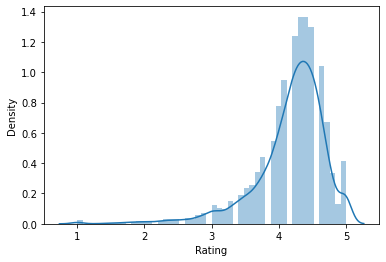

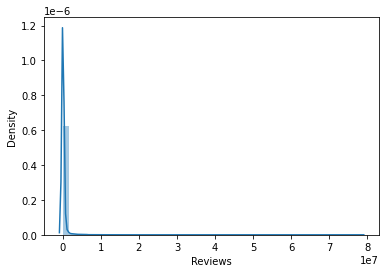

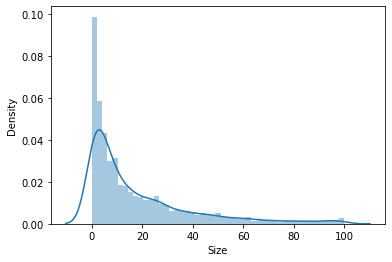

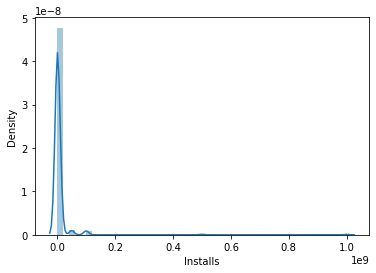

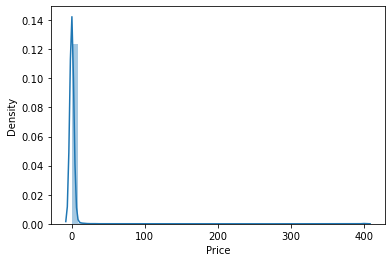

In [47]:
#Plotting distribution plot for all numerical columns
for col in numerical_columns:
    try:
        plt.figure(figsize=(6,4))
        sns.distplot(df[col])
        plt.show()
    except Exception as e:
            print(e)

Rating column is left skewed , rest every numerical column is highly right skewed.

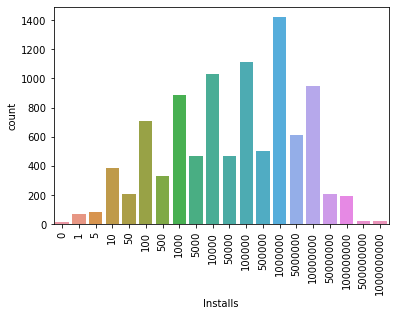

In [48]:
sns.countplot(df["Installs"])
plt.xticks(rotation=90);

1. More than 1400 Apps out of 9688 Apps has more than 1 million installs.
2. There are 20 apps with more than 1 Billion (1,000,000,000) installs/downloads.

<AxesSubplot:xlabel='Rating', ylabel='Count'>

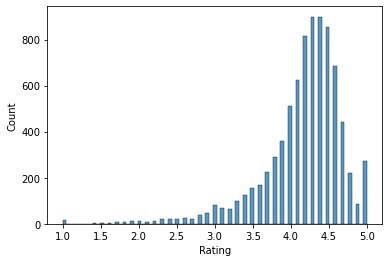

In [49]:
sns.histplot(x=df["Rating"])

Most of the apps got the rating between 4.0 and 4.7

# **Plotting graphs for Categorical Columns** 

In [50]:
pd.value_counts(df['Category']).iloc[:10].index

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PRODUCTIVITY',
       'PERSONALIZATION', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object')

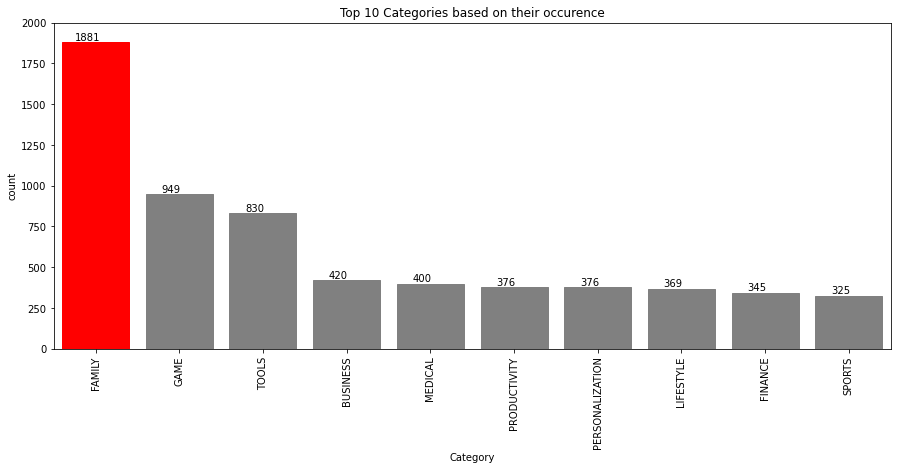

In [51]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Top 10 Categories based on their occurence")
plt.ylim(0, 2000) # Setting the limit of y-axis
graph=sns.countplot(x='Category',data=df,order=pd.value_counts(df['Category']).iloc[:10].index)
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')
    if p.get_height() == df["Category"].value_counts()[0]:
        p.set_color('red')    
    else:
        p.set_color('grey')

In Category column "FAMILY" is the highest occuring category with frequency more than 1800.

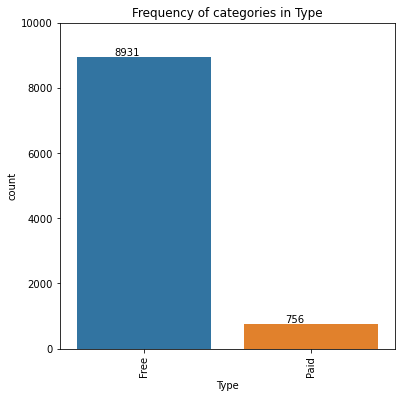

In [52]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
plt.title("Frequency of categories in Type")
plt.ylim(0,10000)
graph=sns.countplot(x=df["Type"])
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')

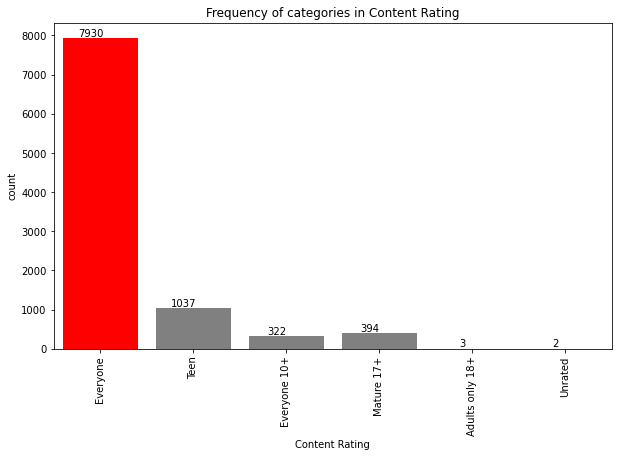

In [53]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title("Frequency of categories in Content Rating")
graph=sns.countplot(x=df["Content Rating"])
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')
    if p.get_height() == df["Content Rating"].value_counts()[0]:
        p.set_color('red')    
    else:
        p.set_color('grey')

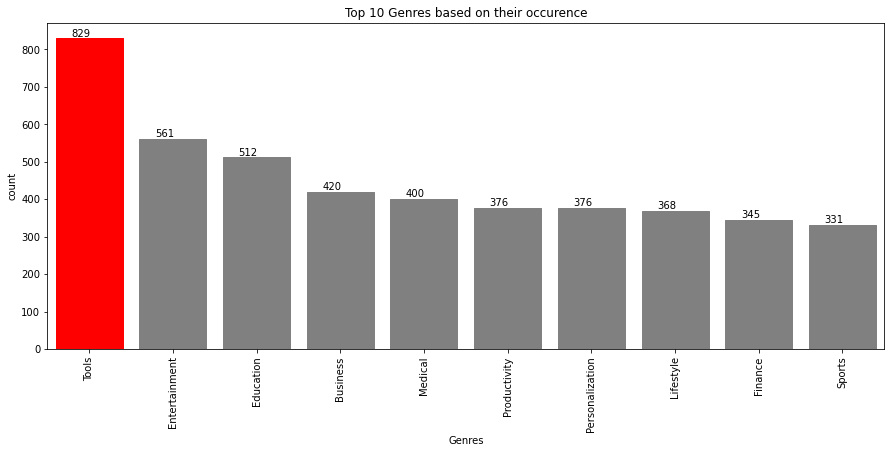

In [54]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Top 10 Genres based on their occurence")
graph=sns.countplot(x='Genres',data=df,order=pd.value_counts(df['Genres']).iloc[:10].index)
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')
    if p.get_height() == df["Genres"].value_counts()[0]:
        p.set_color('red')    
    else:
        p.set_color('grey')

Tools Genre is on the first position with the highest frequency(829) and Entertainment and Education is on 2nd  and 3rd position respectively.

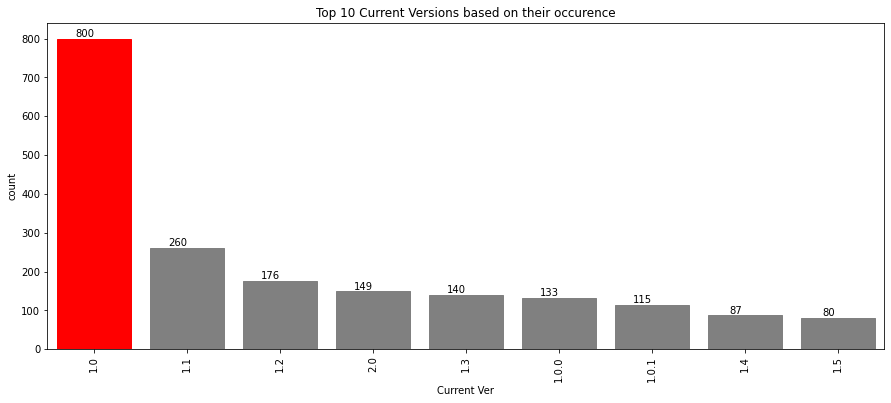

In [55]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Top 10 Current Versions based on their occurence")
graph=sns.countplot(x='Current Ver',data=df,order=pd.value_counts(df['Current Ver']).iloc[1:10].index)
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')
    if p.get_height() == df["Current Ver"].value_counts()[1]:
        p.set_color('red')    
    else:
        p.set_color('grey')

1.0 is the current version with the highest frequency (800).

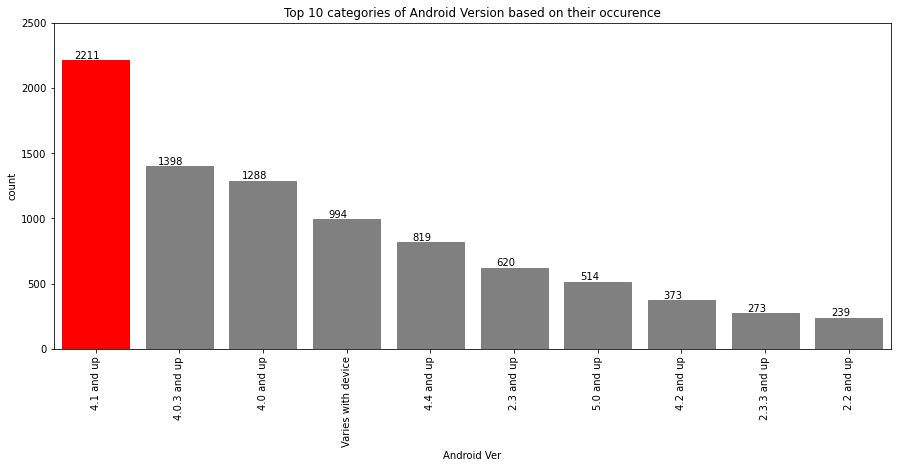

In [56]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Top 10 categories of Android Version based on their occurence")
plt.ylim(0,2500)
graph=sns.countplot(x='Android Ver',data=df,order=pd.value_counts(df['Android Ver']).iloc[:10].index)
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')
    if p.get_height() == df["Android Ver"].value_counts()[0]:
        p.set_color('red')    
    else:
        p.set_color('grey')

Most of the apps require android version 4.0 and up.

# **Bivariate Analysis**

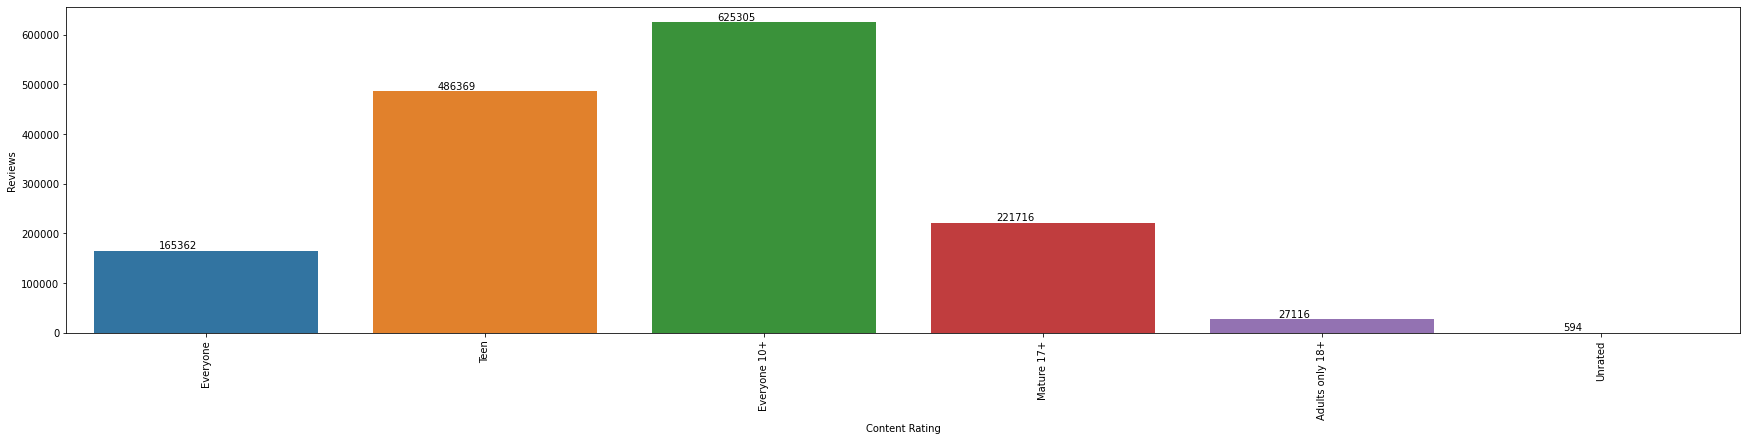

In [57]:
plt.figure(figsize=(30,6))
plt.xticks(rotation=90)
graph=sns.barplot(x=df["Content Rating"],y=df["Reviews"],ci=None)
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')

Content Rating "Everyone 10+" has got the highest number of average reviews which is more than 6,00,000. 

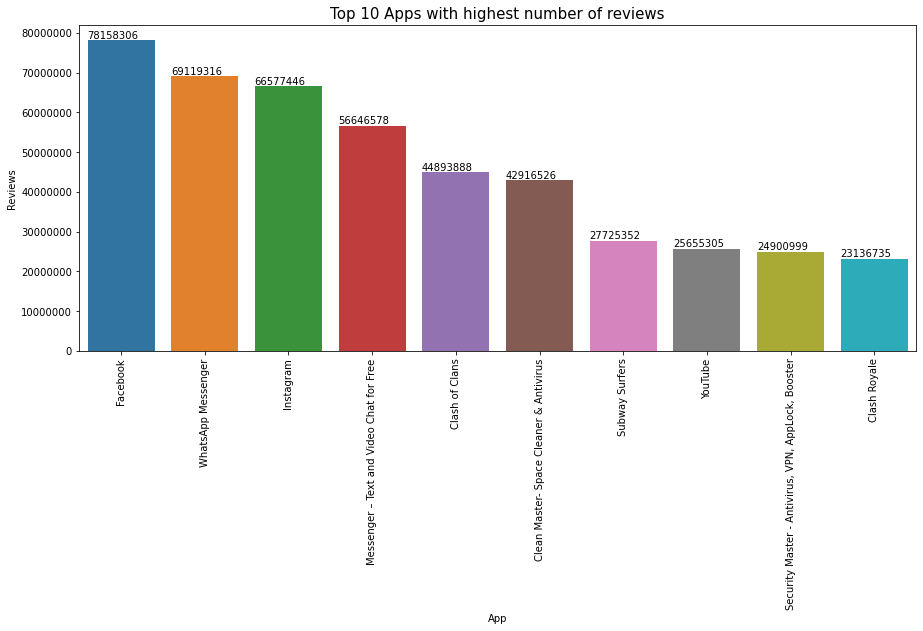

In [58]:
plt.figure(figsize=(15,6))
plt.title(label="Top 10 Apps with highest number of reviews",fontsize=15,color="black")
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False,axis="y",style="plain")
graph=sns.barplot(data=df.nlargest(10,"Reviews"),x="App",y="Reviews")
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')

1. Facebook has got the maximum number of reviews i.e., 78158306 reviews.
2. Top 4 apps which has got the maximum number of reviews are social media apps and all apps are owned by Meta Inc. 
3. There are 3 games in Top 10.

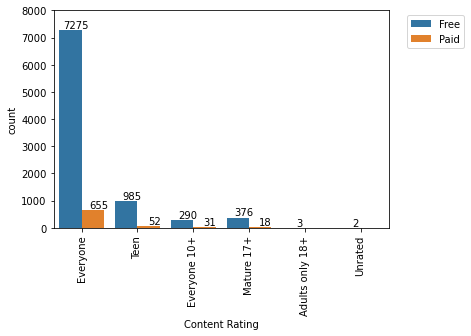

In [59]:
graph = sns.countplot(x=df["Content Rating"],hue=df["Type"])
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')
plt.xticks(rotation=90)
plt.ylim(0,8000)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left") # Getting the legend outside the plot

1. More than 91% apps are free where Content Rating is "Everyone".
2. Ratio of free apps is more than paid apps in all categories of Content Rating.

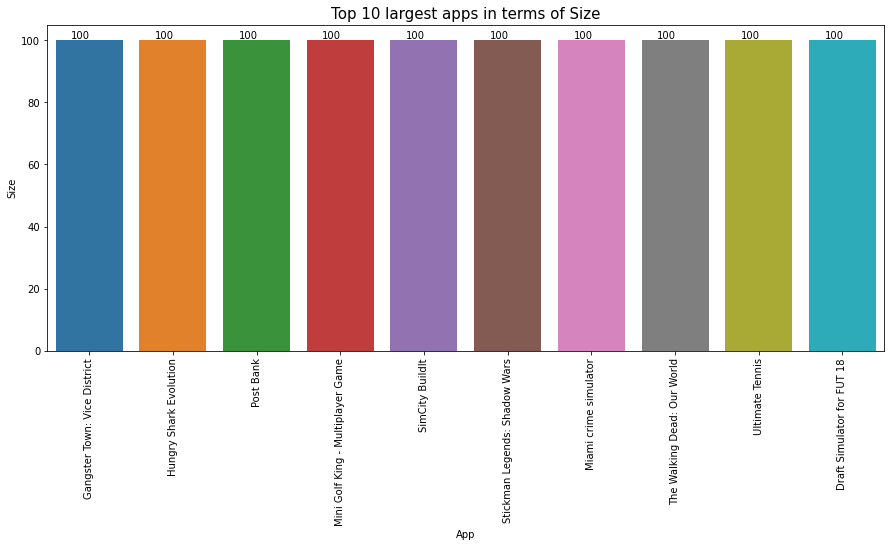

In [60]:
plt.figure(figsize=(15,6))
plt.title(label="Top 10 largest apps in terms of Size",fontsize=15,color="black")
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False,axis="y",style="plain")# For not converting the y axis to scientific notations.
graph=sns.barplot(data=df.nlargest(10,"Size"),x="App",y="Size")
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')

These are the apps with the maximum size of apps (100 mb) available in our datasets.

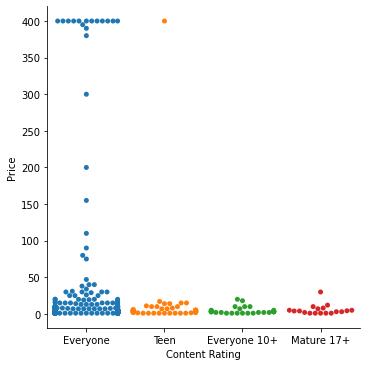

In [61]:
sns.catplot(kind="swarm",data=df.loc[df["Price"]>0],x="Content Rating",y="Price")

Most of the paid apps are priced less than 50 dollars. But there are some apps which are priced 399.99 dollars.

<AxesSubplot:title={'center':'Distribution of size with respect to Content Rating'}, xlabel='Content Rating', ylabel='Size'>

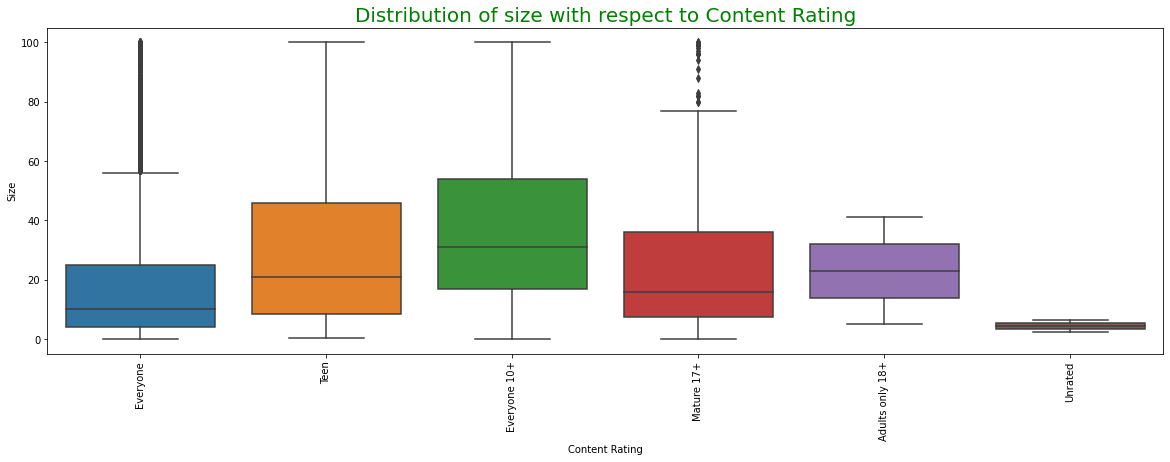

In [62]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.title(label="Distribution of size with respect to Content Rating",fontsize=20,color="green")
sns.boxplot(x="Content Rating",y="Size",data=df.loc[df["Size"]>0])

There are outliers in "Everyone" and "Mature 17+" categories with respect to size of the app.

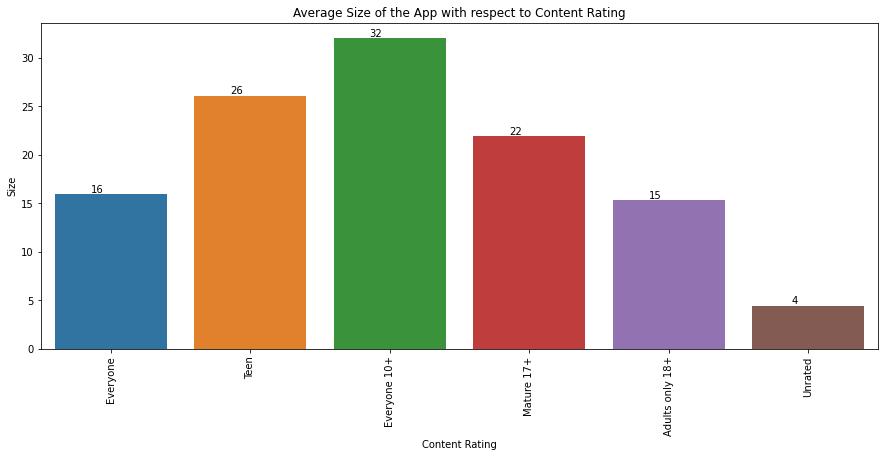

In [63]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Average Size of the App with respect to Content Rating")
graph=sns.barplot(x=df["Content Rating"],y=df["Size"],ci=None)
# Annotating values on bars
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x() + 0.3, p.get_height()),ha='center',va='bottom',color='black')

Content Rating wise "Everyone 10+" has the highest average size of the apps. 


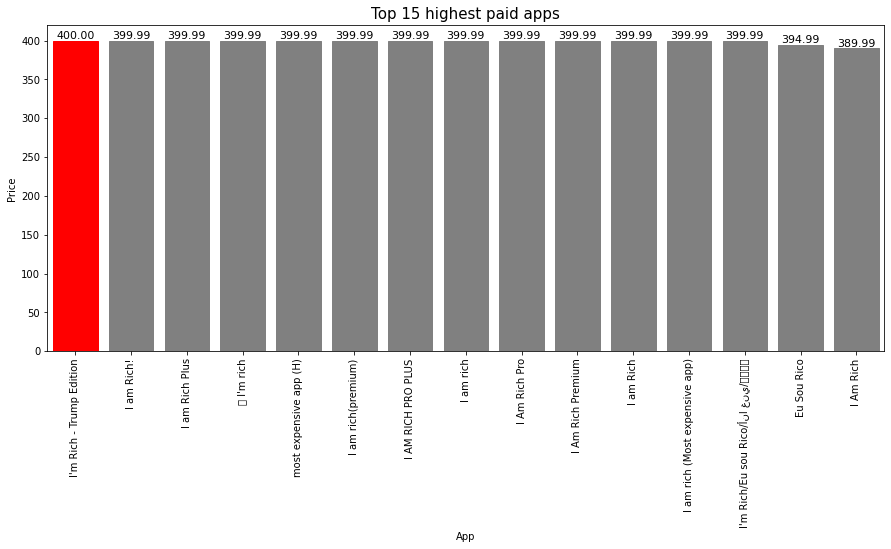

In [64]:
plt.figure(figsize=(15,6))
plt.title(label="Top 15 highest paid apps",fontsize=15,color="black")
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False,axis="y",style="plain")
graph=sns.barplot(data=df.nlargest(15,"Price"),x="App",y="Price")
# Annotating values on bars
for p in graph.patches:
    graph.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', fontsize=11, color='black')
    if p.get_height() == max(df["Price"]):
        p.set_color('red')    
    else:
        p.set_color('grey')

1. Surprisingly most of the Top paid apps have I'm Rich in their app names.
2. Most of apps among top paid apps are intensionally priced at 399.99 dollars.


 ### **Final Analysis**

 1. Most of the Apps are free.
 2. Top highest paid apps have "I'm Rich" in their names.
 3. Social Media Apps like Facebook, Whatsapp, etc. has got the highest number of reviews.
 4. Most of the apps are for everyone(content is not vulgar) and content rating is family.
 5. The highest app size in this dataset is 100.00 mb.
 6. Paid apps are mostly priced below 50 dollars across all categories.
